In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('covid_19_data.csv', parse_dates = ['ObservationDate','Last Update'])

In [4]:
checkup=data.groupby(['Country/Region','Province/State','ObservationDate']).count().iloc[:,0]

In [5]:
checkup[checkup>1]

Country/Region  Province/State  ObservationDate
Mainland China  Gansu           2020-03-11         2
                                2020-03-12         2
                Hebei           2020-03-11         2
                                2020-03-12         2
Name: SNo, dtype: int64

In [6]:
data[data['Province/State'].isin(['Gansu','Hebei']) & data['ObservationDate'].isin(['2020-03-11','2020-03-12'])]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4748,4749,2020-03-11,Hebei,Mainland China,2020-03-11 02:18:14,318.0,6.0,307.0
4765,4766,2020-03-11,Gansu,Mainland China,2020-03-11 14:33:03,127.0,2.0,88.0
4925,4926,2020-03-11,Gansu,Mainland China,2020-03-11 02:18:28,0.0,0.0,0.0
4926,4927,2020-03-11,Hebei,Mainland China,2020-03-11 02:18:29,0.0,0.0,0.0
4965,4966,2020-03-12,Hebei,Mainland China,2020-03-12 05:33:02,318.0,6.0,308.0
4983,4984,2020-03-12,Gansu,Mainland China,2020-03-11 14:33:03,127.0,2.0,88.0
5146,5147,2020-03-12,Gansu,Mainland China,2020-03-11 02:18:28,0.0,0.0,0.0
5147,5148,2020-03-12,Hebei,Mainland China,2020-03-11 02:18:29,0.0,0.0,0.0


In [7]:
data=data.drop([4926,4925,5147,5146])

In [9]:
data.loc[data['Province/State']=='Macau','Country/Region']='Macau'

In [10]:
data.loc[data['Province/State']=='Hong Kong','Country/Region']='Hong Kong'

In [11]:
data=data.drop(['SNo','Last Update'],axis=1)

In [12]:
data=data.rename(columns={'Country/Region':'Country','ObservationDate':'Date'})

In [13]:
data.isnull().sum()

Date                 0
Province/State    3090
Country              0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [14]:
daily=data.sort_values(['Date','Country','Province/State'])

In [15]:
daily

,Date,Province/State,Country,Confirmed,Deaths,Recovered
12,2020-01-22,Hong Kong,Hong Kong,0.0,0.0,0.0
35,2020-01-22,NaN,Japan,2.0,0.0,0.0
20,2020-01-22,Macau,Macau,1.0,0.0,0.0
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
5,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0
6,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0


In [16]:
latest=daily[daily.Date==daily.Date.max()]

In [17]:
country=latest.groupby('Country').sum().sort_values(['Confirmed','Deaths'],ascending=[False,False])

In [18]:
country['Death Rate']=country['Deaths']/country['Confirmed']

In [19]:
country['Recovery Rate']=country['Recovered']/country['Confirmed']

In [26]:
country[country['Confirmed']>1000].sort_values(['Death Rate'],ascending=False).sort_values(['Death Rate','Confirmed'],ascending=False)

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate
Country,,,,,
Italy,47021.0,4032.0,4440.0,0.085749,0.094426
Iran,19644.0,1433.0,6745.0,0.072948,0.343362
Spain,20410.0,1043.0,1588.0,0.051102,0.077805
UK,4014.0,178.0,67.0,0.044345,0.016692
Mainland China,80977.0,3249.0,71158.0,0.040123,0.878743
Netherlands,3003.0,107.0,2.0,0.035631,0.000666
France,12632.0,450.0,12.0,0.035624,0.000950
Belgium,2257.0,37.0,1.0,0.016393,0.000443
US,19101.0,244.0,147.0,0.012774,0.007696


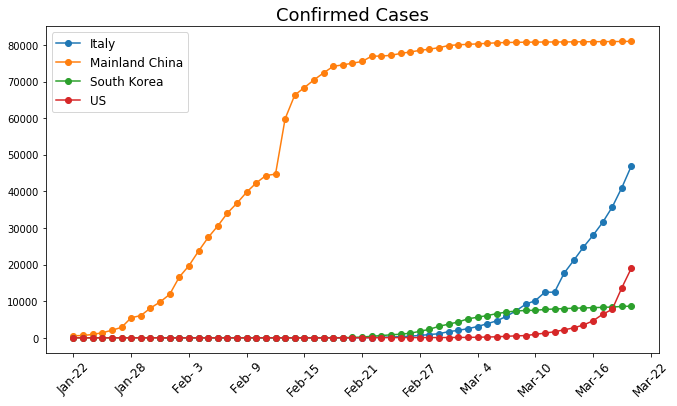

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b-%e')

confirm=daily.groupby(['Country','Date']).Confirmed.sum().loc[(['US','Italy','South Korea','Mainland China'])].unstack(level=0)

fig,ax=plt.subplots(figsize=(11,6))
ax.plot(confirm,marker='o')

plt.title('Confirmed Cases',fontdict={'fontsize':18})
ax.legend(confirm.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45, fontsize=12)
plt.show()

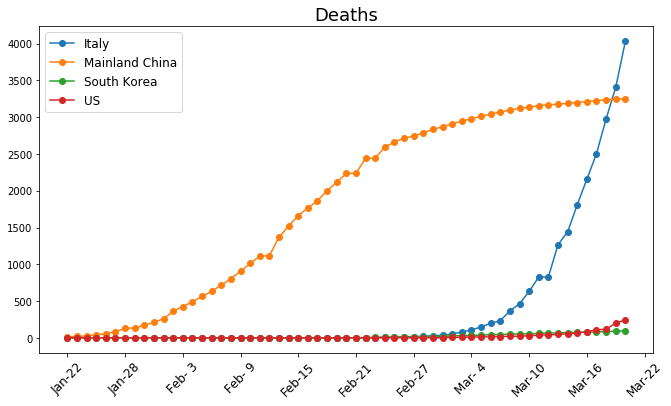

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b-%e')


confirm=daily.groupby(['Country','Date']).Deaths.sum().loc[(['US','Italy','South Korea','Mainland China'])].unstack(level=0)

fig,ax=plt.subplots(figsize=(11,6))
ax.plot(confirm,marker='o')

plt.title('Deaths',fontdict={'fontsize':18})
ax.legend(confirm.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45, fontsize=12)
plt.show()